   **Статистический анализ данных сервиса аренды самокатов GoFast**
   
**Цель исследования**

-описать и визуализировать общую информацию о пользователях и поездках
-найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
-определить помесячную выручку, которую принёс каждый пользователь
-определить тратят ли пользователи с подпиской больше времени на поездки
-определить среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает ли она 3130м
-будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**План исследования**

-прочитать и изучитб общую информацию о каждом датафрейме.
-привести столбец date к типу даты pandas.
-создать новый столбец с номером месяца на основе столбца date.
-проверить наличие пропущенных значений и дубликатов в датафреймах. Обработать их, если такие значения присутствуют.
-описать и визуализировать общую информацию о пользователях и поездках:
  а)частота встречаемости городов;
  б) соотношение пользователей с подпиской и без подписки;
  в) возраст пользователей;
  г) расстояние, которое пользователь преодолел за одну поездку;
  д) продолжительность поездок.
-объединить данные о пользователях, поездках и подписках в один датафрейм.
-создать ещё два датафрейма из датафрейма:
  а)c данными о пользователях без подписки;
  б)с данными о пользователях с подпиской.
-визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.  
-создать датафрейм с агрегированными данными о поездках 
-добавить столбец с помесячной выручкой, которую принёс каждый пользователь.
-проверить гипотезы:
  а)тратят ли пользователи с подпиской больше времени на поездки
  б)что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130м
  в)будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st
from math import factorial

#### Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_users.info()
data_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


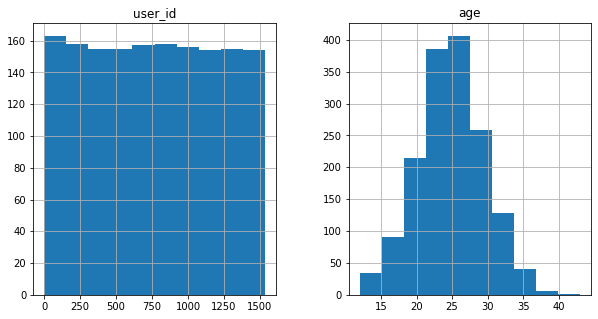

In [3]:
data_users.hist(figsize=(10, 5));


In [4]:
data_rides = pd.read_csv('/datasets/rides_go.csv',parse_dates=['date'])
data_rides.info()
data_rides.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


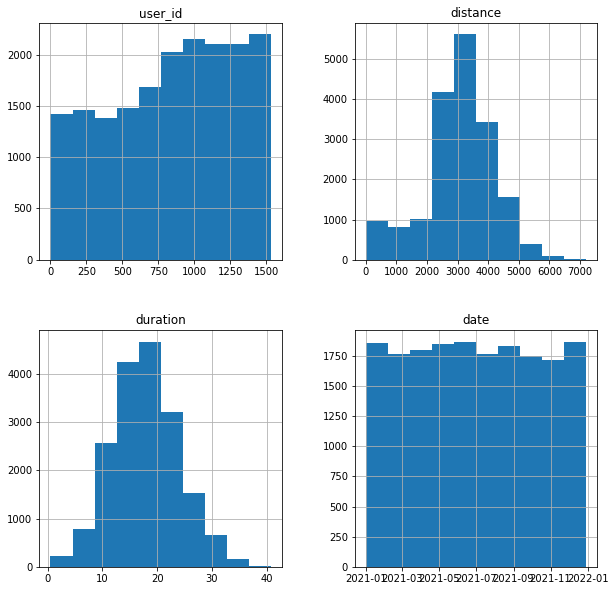

In [5]:
data_rides.hist(figsize=(10, 10));

In [6]:
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
data_subscriptions.info()
data_subscriptions.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод** 
В основном услугами пользуются люди до 40 лет, количество используемых минут до 34, расстояние до 6.5км
Пропусков нет.
Более подробно рассмотрим далее.

#### Шаг 2. Предобработка данных

In [7]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

In [8]:
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month

In [9]:
print('Минимальная дата :', data_rides['date'].min())
print('Максимальная дата:', data_rides['date'].max())

Минимальная дата : 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


В исследовании использован только 2021год

In [10]:
print(data_rides.isna().sum())
print(data_subscriptions.isna().sum())
print(data_users.isna().sum())

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


In [11]:
data_users.duplicated().sum()

31

In [12]:
data_users.drop_duplicates(inplace=True)
data_users.duplicated().sum()

0

In [13]:
data_rides.duplicated().sum()

0

In [14]:
data_subscriptions.duplicated().sum()

0

In [15]:
data_rides['user_id'].unique()

array([   1,    2,    3, ..., 1532, 1533, 1534])

In [16]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [17]:
data_users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

**Вывод** 
Привели столбец date к типу даты pandas
Создали новый столбец с номером месяца на основе столбца date
Проверили пропуски- их нет.
В столбцах 'city' и  'subscription_type' ошибок нет


#### Шаг 3. Исследовательский анализ данных

In [18]:
count_users_by_city = data_users['city'].value_counts()
print(count_users_by_city)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


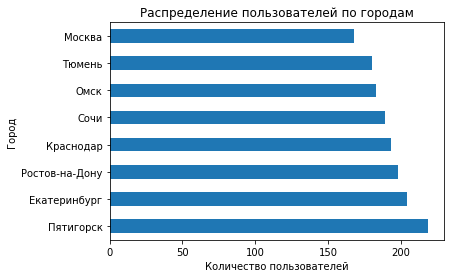

In [19]:
ax = data_users['city'].value_counts().plot.barh()
plt.title('Распределение пользователей по городам')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()

В Пятигорске больше всего поездок, в Москве меньше всего. Возможно такое распределение связано с тем, что сезон самокатов в теплых городах(Пятигорск, Краснодар, Сочи и т.д.) дольше, поэтому поездое больше.

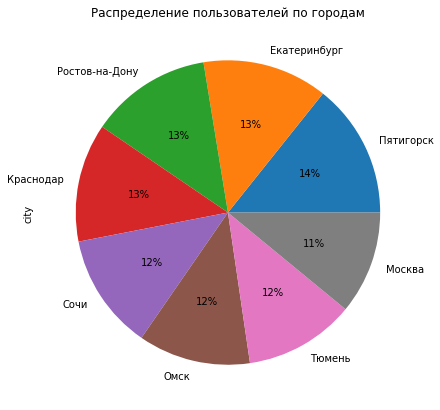

In [20]:
count_users_by_city.plot(
    kind = 'pie', 
    y = count_users_by_city,
    autopct = '%1.0f%%',
    figsize=(7,7), 
    title = 'Распределение пользователей по городам');

По круговой диаграмме видно, что распределение примерно одинаковое, несильно отличается. От 11 до 14%

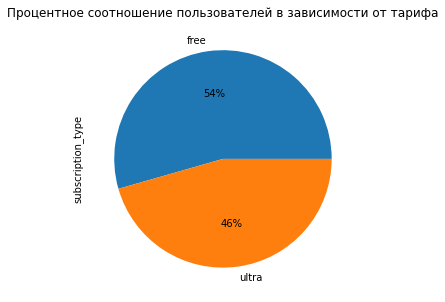

In [21]:
count_sub = data_users['subscription_type'].value_counts()
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
   y = count_sub, 
    autopct = '%1.0f%%',  
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');
#ax = data_subscriptions['subscription_type'].value_counts().plot.bar()
#plt.show()

Без подписки пользователей на 8% больше, чем без нее. Возможно, люди, которые редко пользуются самокатами не хотят платить абонентскую плату каждый месяц и их количество больше.

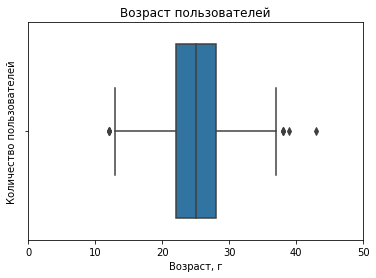

In [22]:
data_users['age'].sort_values(ascending=False)
sns.boxplot(x=data_users['age'])
plt.title('Возраст пользователей')
plt.xlabel('Возраст, г')
plt.ylabel('Количество пользователей')
_ = plt.xlim(0, 50)

In [23]:
data_users.query('age<13')

,user_id,name,age,city,subscription_type
34,35,Руслан,12,Пятигорск,ultra
66,67,Анастасия,12,Ростов-на-Дону,ultra
664,665,Герман,12,Сочи,ultra
727,728,Вячеслав,12,Пятигорск,free


 Возможно дети катались на отдыхе("теплые" города) 

In [24]:
print(data_users.query('age>37'))

      user_id      name  age       city subscription_type
383       384    Виктор   38       Омск             ultra
453       454  Вероника   38  Краснодар             ultra
804       805      Петр   38     Тюмень              free
961       962   Дмитрий   39     Москва              free
1201     1202  Ангелина   43     Москва              free


взрослых пользователей очень мало. Видимо, решили попробовать и не понравилось

 Межквартильный размах в пределах 22-28 лет, это самые активные молодые люди. Менее 12 лет(им не разрешают родители) и более 38 лет(возраст и физически не такие выносливые) - это выбросы 

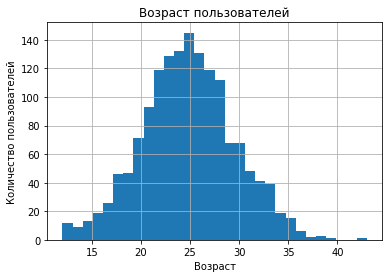

In [25]:
data_users['age'].sort_values
plt.hist(data_users['age'], bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Возраст пользователей до 37 лет. Люди старше вряд ли пользуются самокатами, возможно, из-за возраста(физически сложнее). Большинству пользователей от 18 до 31 года. 

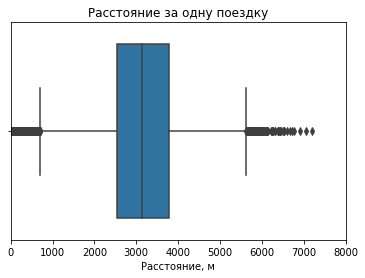

In [26]:
round(data_rides['distance'].sort_values(ascending=False), 2)
sns.boxplot(x=data_rides['distance'])
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 8000)

 Межквартильный размах здесь в пределах от 2,5км до 3,8км. Среднее расстояние от дома до общественного транспорта, от метро до работы и т.д. Менее 800м (можно дойти пешком) и более 5,5км (далеко, можно уже ехать на общественном транспорте) - это выбросы </div>

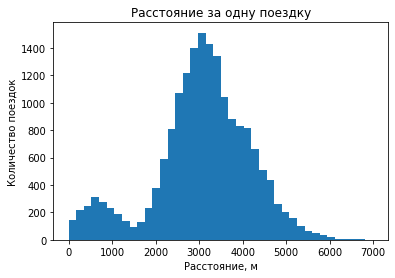

<Figure size 1440x1440 with 0 Axes>

In [27]:
plt.hist(data_rides['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Расстояние, которое проезжают клиенты  максимально до 7,5км, в основном от 1км до 5,5км, остальное выбросы. Мы видим пики в 700м и 3100м, возможно короткие поездки связаны с тем, что клиентам нужно добраться от машины до общественного транспорта быстрее, опаздывают, либо первый раз арендуют самокат и не смогли пользоваться, может быть была неисправность или разрядка самоката. Основной пик в 3100м (это среднее время), связан с тем, что клиентам нужно добраться от метро до работы быстрее и без пробок, многие доставщики пользуются для уменьшения времени доставки. Думаю это примерное расстояние от метро до работы, от дома до общественного транспорта и т.д.

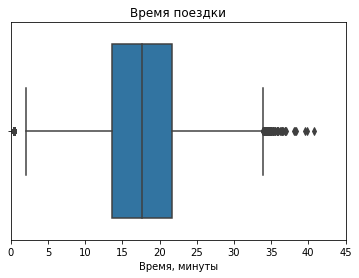

In [28]:
data_rides['duration'].sort_values(ascending=False)
sns.boxplot(x = data_rides['duration'])
plt.title('Время поездки')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 45)


 Межквартильный размах в пределах от 13 до 22 минут, среднее время для средней пездки в 3км. при скорости 10-15 км/ч, быстрее не разгонишься в черте города. Менее 2минут и более 33минут(за это время уже устанешь ехать) - это выбросы 

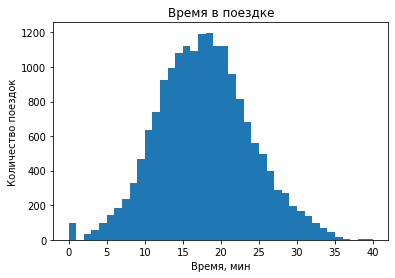

<Figure size 1440x1440 with 0 Axes>

In [29]:
plt.hist(data_rides['duration'], bins=40, range = (0, 40))
plt.title('Время в поездке')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Время, которое проводят в поездке, составляет до 42 минут. В основном от 2мин до 34мин, остальное выбросы. Распределение нормальное.

#### Шаг 4. Объединение данных

In [30]:
data1 = data_users.merge(data_rides)
data1 = data1.merge(data_subscriptions)
data1.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [32]:
data1.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Объединили три датафрейма в один. Количество строк совпадает с исходным датафреймом, пропусков также нет.

In [33]:
free_data1 = data1.query("`subscription_type` == 'free'")
free_data1.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [34]:
free_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [35]:
free_data1.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [36]:
free_data1['distance'].median()

3114.648464847295

In [37]:
free_data1['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

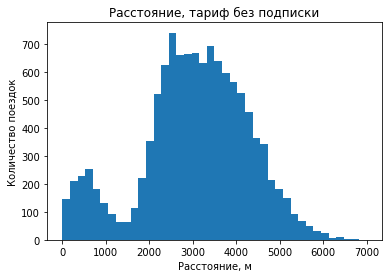

<Figure size 1440x1440 with 0 Axes>

In [38]:
plt.hist(free_data1['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, тариф без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Пользователи без подписки проезжают до 6,8км, в основном от 2х до 5км. В среднем 3045, медианное значение 3114(разница небольшая), значит распределение нормальное. Длительные поездки, возможно, связаны с тем, что люди  катаются на отдыхе, делают перерыв, потом опять катаются.

In [39]:
free_data1['duration'].median()

17.326890226082043

In [40]:
free_data1['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

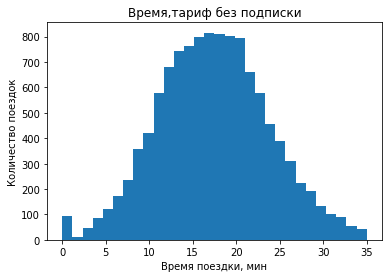

<Figure size 1440x1440 with 0 Axes>

In [41]:
plt.hist(free_data1['duration'], bins=30, range = (0, 35))
plt.title('Время,тариф без подписки')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Время, которое используют на тарифе без подписки до 35мин, в основном от 10 до 25  мин. Среднее и медиана почти равны(17.39 и 17.32), значит распределение тоже нормальное.

In [42]:
ultra_data1 = data1.query("`subscription_type` == 'ultra'")
ultra_data1.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [43]:
ultra_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [44]:
ultra_data1.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [45]:
ultra_data1['distance'].median()

3148.6372291760854

In [46]:
ultra_data1['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

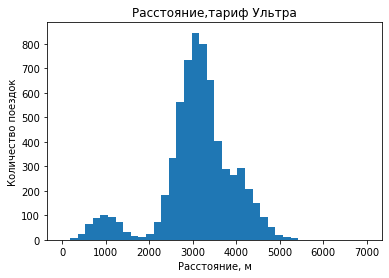

<Figure size 1440x1440 with 0 Axes>

In [47]:
plt.hist(ultra_data1['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние,тариф Ультра')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Расстояние абонентов тарифа Ультра до 5 км, в основном от 2,5км до 4км. В среднем 3115м

In [48]:
ultra_data1['duration'].median()

18.17815320055055

In [49]:
ultra_data1['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

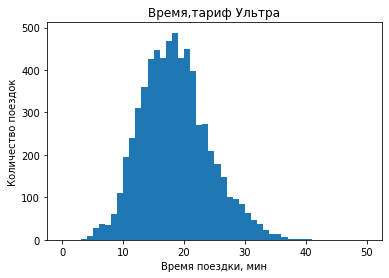

<Figure size 648x360 with 0 Axes>

In [50]:
plt.hist(ultra_data1['duration'], bins=50, range = (0, 50))
plt.title('Время,тариф Ультра')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(9,5))
plt.show()

Время, используемое подписчиками тарифа Ультра, до 35 мин, в основном от 12 до 25 мин. В среднем 18.54мин

**Вывод** 
Медианное расстояние больше у пользователей тарифа Ультра больше на 34 метра(3114м и 3148м), разброс большинства значений по расстоянию больше у тарифа без подписки(от 2-4.5км, у тарифа Ультра от 2.5-4км). Медианное потраченное время больше у подписчиков на тарифе Ультра(8мин), чем без подписки(7мин). В основном в тарифе ультра количество потраченных минут 12-25, у тарифа без подписки от 10-25мин. Можно сделать вывод, что с клиенты с подпиской тратят больше времени на поездку и расстояние у них больше.

#### Шаг 5. Подсчёт выручки

In [51]:
data1['duration'] = np.ceil(data_rides['duration']) 
data1['duration'].head()

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
Name: duration, dtype: float64

Округлила минуты в большую сторону

In [52]:
total = pd.pivot_table(data1,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration','start_ride_price', 'minute_price', 'name','subscription_fee', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum,
                                      'start_ride_price':sum, 
                                      'subscription_fee':min,
                                      'minute_price':min,
                                      'start_ride_price':min,
                                      'name' : len, 
                                      'subscription_type' : min})
total.rename(columns = {'name' : 'count_trip'}, inplace = True)
total['duration'] = np.ceil(total['duration'])
total.sort_values(by='month').head(10)

distance  duration  minute_price  count_trip  \
month user_id                                                     
1     1         7027.511294      42.0             6           2   
      1061     12637.249630      43.0             8           3   
      1063      3276.362299      10.0             8           1   
      1064      5297.324649      15.0             8           1   
      1065     14547.099333      99.0             8           4   
      1066      2809.064949      19.0             8           1   
      1067      3864.900780      22.0             8           1   
      1069      7007.076943      53.0             8           3   
      1071      3635.094136      15.0             8           1   
      1072      2498.615999      11.0             8           1   

               start_ride_price  subscription_fee subscription_type  
month user_id                                                        
1     1                       0               199             ultra  
      1061                   50                 0              free  
      1063                   50                 0              free  
      1064                   50                 0              free  
      1065                   50                 0              free  
      1066                   50                 0              free  
      1067                   50                 0              free  
      1069                   50                 0              free  
      1071                   50                 0              free  
      1072                   50                 0              free

In [53]:
total.query('user_id == 5')

,,distance,duration,minute_price,count_trip,start_ride_price,subscription_fee,subscription_type
month,user_id,,,,,,,
1,5,3914.646990,13.0,6,1,0,199,ultra
2,5,2561.108241,12.0,6,1,0,199,ultra
3,5,10633.732186,57.0,6,3,0,199,ultra
4,5,3373.080412,15.0,6,1,0,199,ultra
5,5,5823.074031,33.0,6,2,0,199,ultra
7,5,3311.974724,12.0,6,1,0,199,ultra
8,5,2720.817111,18.0,6,1,0,199,ultra
10,5,3218.515955,20.0,6,1,0,199,ultra


In [54]:
total.isna().sum()

distance             0
duration             0
minute_price         0
count_trip           0
start_ride_price     0
subscription_fee     0
subscription_type    0
dtype: int64

In [55]:
#def income(row):
  #  if row['subscription_type'] == 'ultra':
  #      return 6 * row['duration'] + 199
  ##      return 8 * row['duration'] + 50 * row['count_trip']
#total['income_per_month'] = total.apply(income, axis=1)
#total['income_per_month'].head(10)
total['income_per_month']= (total['start_ride_price']*total['count_trip'])+(total['minute_price']*total['duration'])+total['subscription_fee']
total['income_per_month'].head(10)

month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
       13         451.0
       14         409.0
       15         433.0
       20         373.0
       22         277.0
Name: income_per_month, dtype: float64

In [56]:
total.query('user_id == 51')

,,distance,duration,minute_price,count_trip,start_ride_price,subscription_fee,subscription_type,income_per_month
month,user_id,,,,,,,,
1,51,7285.366019,55.0,6,2,0,199,ultra,529.0
2,51,2960.759182,31.0,6,1,0,199,ultra,385.0
4,51,6055.645485,43.0,6,2,0,199,ultra,457.0
6,51,6569.357344,31.0,6,2,0,199,ultra,385.0
7,51,2539.243697,20.0,6,1,0,199,ultra,319.0
11,51,3825.988269,23.0,6,1,0,199,ultra,337.0


**Вывод** 
Создали датафрейм с агрегированными данными о поездках и нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Добавили столбец с помесячной выручкой, которую принёс каждый пользователь.

In [57]:
total['income_per_month'].sum()

3878641.0

In [58]:
total1=total.query("`subscription_type` == 'ultra'")
total2=total.query("`subscription_type` == 'free'")
print('Медианная выручка на тарифе Ультра', total1['income_per_month'].median())
print('Медианная выручка на тарифе Free', total2['income_per_month'].median())

Медианная выручка на тарифе Ультра 337.0
Медианная выручка на тарифе Free 274.0


 Медианное значение выручки за месяц больше у клиентов с подпиской.

#### Шаг 6. Проверка гипотез

Нулевая гипотеза- продолжительность поездок с подпиской ‘ultra’ и ‘free’ равна.
Правостороняя гипотеза- продолжительность поездок с подпиской ‘ultra’ больше, чем без подписки.

In [59]:
ultra = ultra_data1['duration'] 

free = free_data1['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha =0.05

print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [60]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


 Нулевая гипотеза отвергнута, значит клиенты с подпиской больше времени используют, клиенты с подпиской выгоднее бизнесу, т.к. они платят абонентскую плату каждый месяц. Плюс если они платят абонентскую плату, значит они чаще пользуются услугами, чтобы "отбить" разницу в стоимсоти минут.

Нулевая гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равна 3130 метров
Правосторонняя гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров

In [61]:
ultra_dist = ultra_data1['distance']

optimal_value = 3130.0

alpha =0.05

results = st.ttest_1samp(
    ultra_dist, 
    optimal_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Нулевая гипотеза- помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки. 
Правостороняя гипотеза- помесячная выручка от пользователей с подпиской  ‘ultra’ по месяцам больше, чем без подписки.

In [62]:
ultra_per_mnth = total.loc[total.subscription_type == 'ultra', 'income_per_month'] 

free_per_mnth = total.loc[total.subscription_type == 'free', 'income_per_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha =0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод**
При проверке гипотез выявлено, что клиенты с подпиской тратят больше времени и приносят больше выручки (нулевые гипотезы были отвергнуты).Это выгодно для бизнеса, т.к. клиенты, которые платят абонентскую плату больше "привязаны" к компании. Они склонны пользоваться чаще услугами и вряд ли будут переходить в другие фирмы.
А вот среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, около 3130м(т.к. не удалось отвергнуть нулевую гипотезу),что оптимально с точки зрения износа самоката и выгодно для бизнеса.

**Общий вывод**

-Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

-проверили данные на пропуски, их нет.
-поменяли тип данных у столбца date из датафрейма data_riders к типу даты.
-добавили столбец month с номером месяца.
-удалили дубликаты.

Провели исследовательский анализ данных:

Выявилм, что количество пользователей по городам примерно одинаково. В Пятигорске больше всего поездок(219), в Москве меньше всего(168).
Пользователей без подписки больше - 54% от общего числа пользователей. Пользователей с подпиской 46%.
Большинству пользователей от 18 до 31 года. 
В основном пользователи проезжают от 2 км до 4 км.
Чаще всего длительность поездки состовляет 10 - 25 минут
-объединили данные о пользователях, поездках и подписках в один датафрейм.
-создали ещё два датафрейма:
  а)c данными о пользователях без подписки;
  б)с данными о пользователях с подпиской.

-визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

 Разброс большинства значений по расстоянию больше у тарифа без подписки(от 2-5км, у тарифа Ультра от 2.5-4км).  В основном в тарифе ультра количество потраченных минут 12-25, у тарифа без подписки от 10-25мин. Можно сделать вывод, что клиенты с подпиской тратят больше времени на поездку и расстояние у них больше.
-добавили столбец с помесячной выручкой, которую принёс каждый пользователь.


 При проверке гипотез выявлено, что клиенты с подпиской тратят больше времени и приносят больше выручки (нулевые гипотезы были отвергнуты). Клиенты с подпиской больше времени рользуются самокатами. Плюс если они платят абонентскую плату, значит они чаще пользуются услугами, чтобы "отбить" разницу в стоимсоти минут.Клиенты, которые платят абонентскую плату больше "привязаны" к компании. Они склонны пользоваться услугами чаще и вряд ли будут переходить в другие фирмы. Медианы  помесячной выручки, которую принёс каждый пользовательу клиента с подпиской 337р.  и 274р. без подписки). Исходя из этих выводов- подписчики выгоднее бизнесу.
 
 А вот среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, около 3130м(т.к. не удалось отвергнуть нулевую гипотезу),что оптимально с точки зрения износа самоката и выгодно для бизнеса.